# Crime Rate Prediction Project

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [7]:
df = pd.read_csv('../train.csv')
df.head() # outputs first 5 lines

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


## Data Preprocessing

In [9]:
df = df.dropna()
df['Dates'] = pd.to_datetime(df['Dates'])
df['Hour'] = df['Dates'].dt.hour
df['DayOfWeek'] = df['Dates'].dt.dayofweek
df['Month'] = df['Dates'].dt.month
label_encoder = LabelEncoder()
df['CategoryEncoded'] = label_encoder.fit_transform(df['Category'])
features = df[['X', 'Y', 'Hour', 'DayOfWeek']]
target = df['CategoryEncoded']

## Clustering

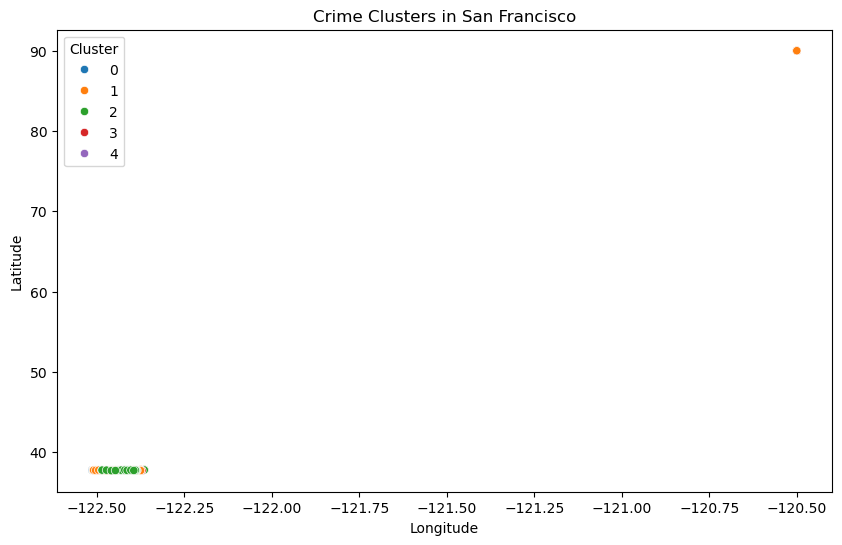

In [11]:
# Kmeans Clustering
kmeans = KMeans(n_clusters=5, random_state=0)
df['Cluster'] = kmeans.fit_predict(features)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='X', y='Y', hue='Cluster', palette='tab10')
plt.title('Crime Clusters in San Francisco')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Prediction

In [12]:
# split data for prediction
X = df[['X', 'Y', 'Hour', 'DayOfWeek']]
y = df['CategoryEncoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Decision Tree Algorithm
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

array([16, 20, 21, ..., 20, 16,  4])

In [17]:
# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.24181614562572368


C:\Users\bodyq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bodyq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

           0       0.03      0.04      0.03       456
           1       0.18      0.26      0.21     23097
           2       0.00      0.00      0.00       113
           3       0.00      0.00      0.00        90
           4       0.12      0.13      0.13     11049
           5       0.04      0.05      0.04      1241
           6       0.03      0.03      0.03       707
           7       0.30      0.46      0.36     16237
           8       0.01      0.01      0.01      1272
           9       0.02      0.02      0.02       346
          10       0.00      0.00      0.00        71
          11       0.02      0.02      0.02       132
          12       0.10      0.11      0.11      3135
          13       0.06      0.07      0.07      4859
          14       0.03      0.02      0.03        48
          15       0.02      0.02      0.02       670
          16       0.37      0.41      0.39     52641
  

C:\Users\bodyq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
# Example usage for the model

new_crime = [[200, 100, 12, 3]]  # [X, Y, Hour, DayOfWeek]
predicted_label = clf.predict(new_crime)
predicted_crime = label_encoder.inverse_transform(predicted_label)
print("Predicted Crime Category:", predicted_crime[0])

Predicted Crime Category: ASSAULT


C:\Users\bodyq\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Visualization

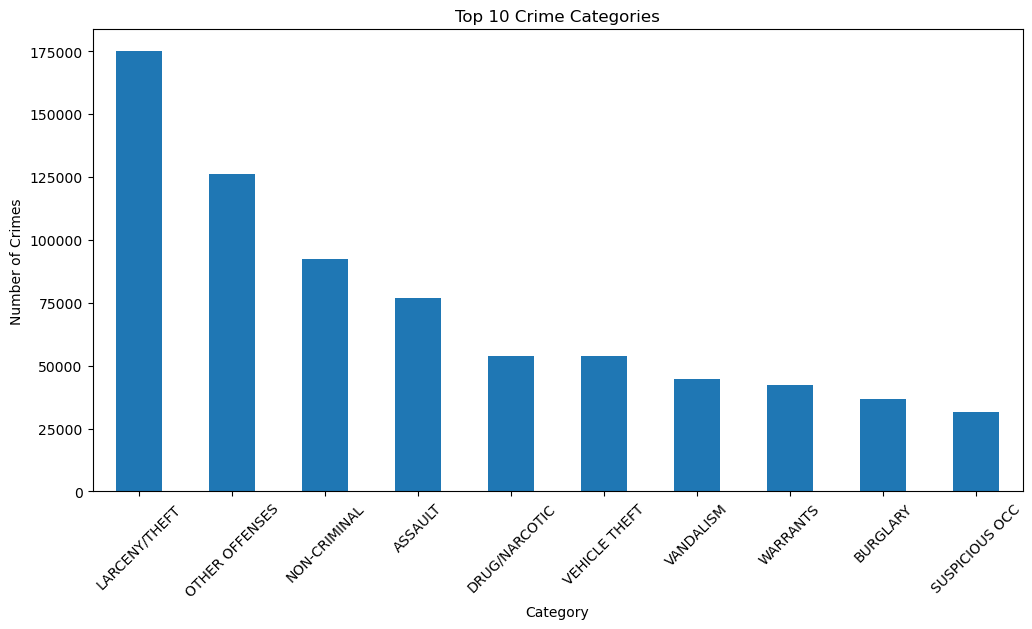

In [19]:
# Crimes by Category
# used bar plot for comparing
plt.figure(figsize=(12, 6))
df['Category'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Crime Categories")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()

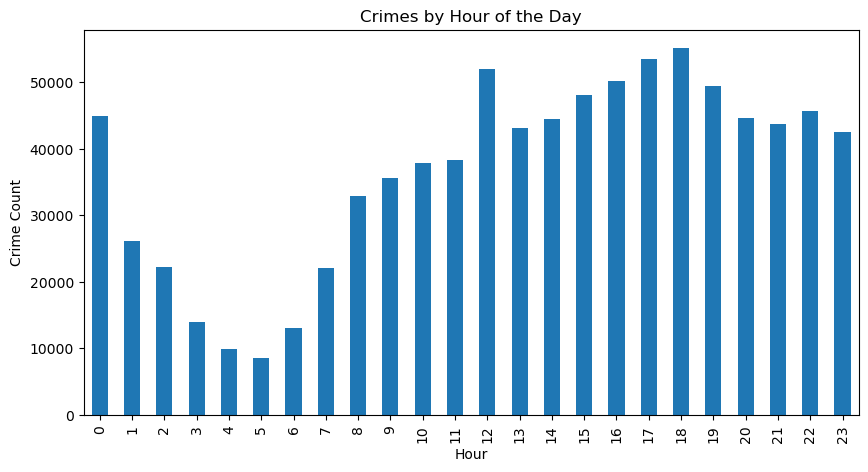

In [21]:
# Crimes by Hour
# used bar plot for comparing
plt.figure(figsize=(10, 5))
df['Hour'].value_counts().sort_index().plot(kind='bar')
plt.title("Crimes by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Crime Count")
plt.show()

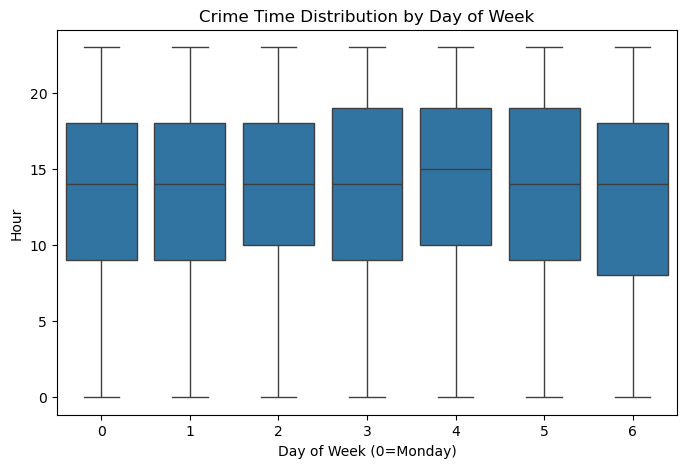

In [23]:
# Box plot: Crimes per Day of Week
# used Box plot to check if there is unusual pattern 
plt.figure(figsize=(8, 5))
sns.boxplot(x='DayOfWeek', y='Hour', data=df)
plt.title("Crime Time Distribution by Day of Week")
plt.xlabel("Day of Week (0=Monday)")
plt.show()